# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('flight_price.csv')

In [4]:
df.shape

(10683, 11)

# So the dataset have 10683 rows and 11 columns

# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

In [5]:
import matplotlib.pyplot as plt

In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

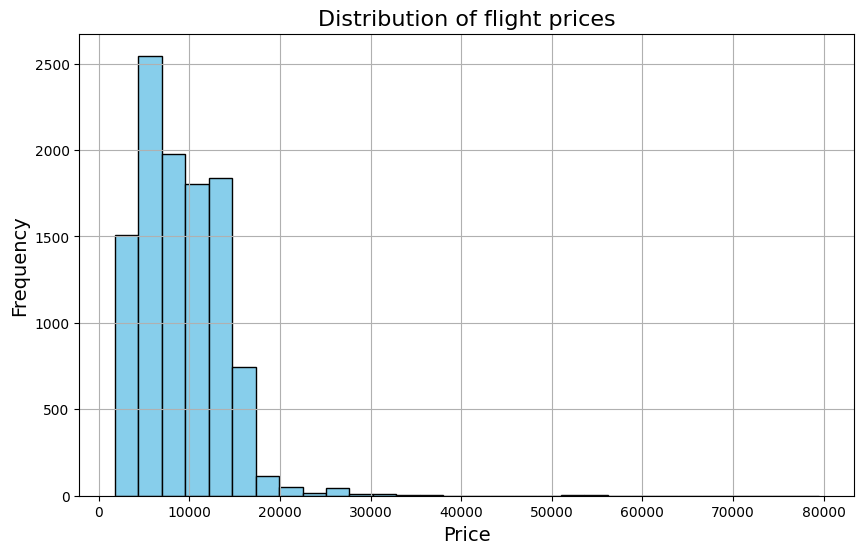

In [10]:
# ploatting the histogram for flight prices
plt.figure(figsize=(10,6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of flight prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [8]:
df['Price'].value_counts()

Price
10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
23677      1
6373       1
13143      1
3527       1
3673       1
Name: count, Length: 1870, dtype: int64

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [21]:
# Ensure the 'Price' column is numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [16]:
# Drop any rows with missing price values
df = df.dropna(subset=['Price'])

In [18]:
# Get the minimum and maximum prices
min_price = df['Price'].min()
max_price = df['Price'].max()

In [20]:
# Display the range, minimum, and maximum price
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Range Of Prices: {max_price - min_price}")

Minimum Price: 1759
Maximum Price: 79512
Range Of Prices: 77753


# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

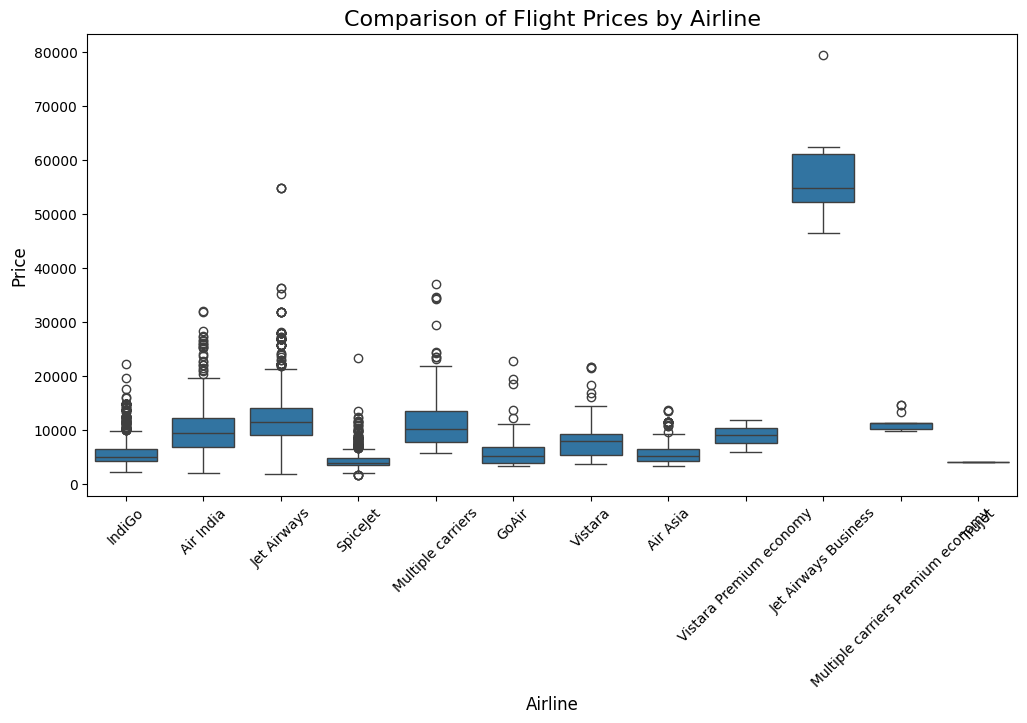

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Comparison of Flight Prices by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [24]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

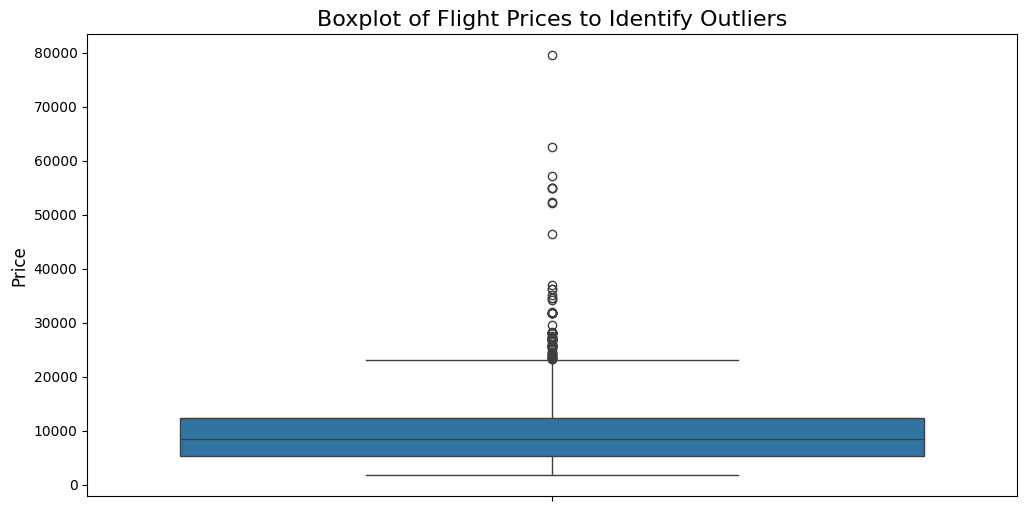

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Price', data=df)
plt.title('Boxplot of Flight Prices to Identify Outliers', fontsize=16)
plt.ylabel('Price', fontsize=12)
plt.show()

In [30]:
# Identify outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Display the outliers
print("Potential Outliers in the Dataset:")
print(outliers[['Airline', 'Price']])

Potential Outliers in the Dataset:
                    Airline  Price
123               Air India  27430
396       Multiple carriers  36983
486             Jet Airways  26890
510             Jet Airways  26890
597               Air India  25139
...                     ...    ...
10353           Jet Airways  24210
10364  Jet Airways Business  57209
10383           Jet Airways  26890
10439           Jet Airways  31825
10511             Air India  26480

[94 rows x 2 columns]


# Impact of Outliers on Analysis:

In [ ]:
1. Statistical Analysis: Outliers can skew the results of statistical analyses (mean, standard deviation) and lead
to incorrect conclusions.

2. Modeling: In predictive modeling, outliers may affect the performance of the model, leading to poor
generalization on unseen data.

3. Data Interpretation: They may also mislead insights derived from the data, such as trends and correlations.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [ ]:
To analyze the Flight Price dataset and identify the peak travel season, you can focus on several key features,
particularly the Date_of_Journey and Price columns. Here’s a step-by-step approach to your analysis and how you
could present your findings to your boss.

# Features to Analyze:

In [ ]:
1. Date_of_Journey: Extract the month and day of the week from the date to see how prices vary by month and day.

2. Price: Analyze how the average flight price changes over different months and days of the week.

3. Additional Features:
(i)Total_Stops: Analyze if direct flights have different price trends compared to flights with stops.
(ii)Airline: Identify if certain airlines have peak seasons that differ from others.

# Analysis Steps:

In [ ]:
1. Data Preparation: (i)Convert the Date_of_Journey to a datetime format.
                     (ii)Extract the month and day of the week from the Date_of_Journey.

2. Average Price Calculation: Calculate the average flight price for each month and each day of the week.

3. Visualization: Create visualizations (like line plots and bar plots) to present the average flight prices by
month and by day of the week.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [34]:
# Clean the data
df.columns = df.columns.str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [38]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')

In [39]:
# Extract month and day of the week
df['Month'] = df['Date_of_Journey'].dt.month
df['Day_Of_Week'] = df['Date_of_Journey'].dt.day_name()

In [42]:
# Calculate average price by month
avg_price_by_month = df.groupby('Month')['Price'].mean().reset_index()

In [44]:
# Calculate average price by day of the week
avg_price_by_day = df.groupby('Day_Of_Week')['Price'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

C:\Users\SOUMEN\AppData\Local\Temp\ipykernel_13596\309293907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Price', data=avg_price_by_month, palette='viridis')
C:\Users\SOUMEN\AppData\Local\Temp\ipykernel_13596\309293907.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_day.index, y=avg_price_by_day.values, palette='viridis')


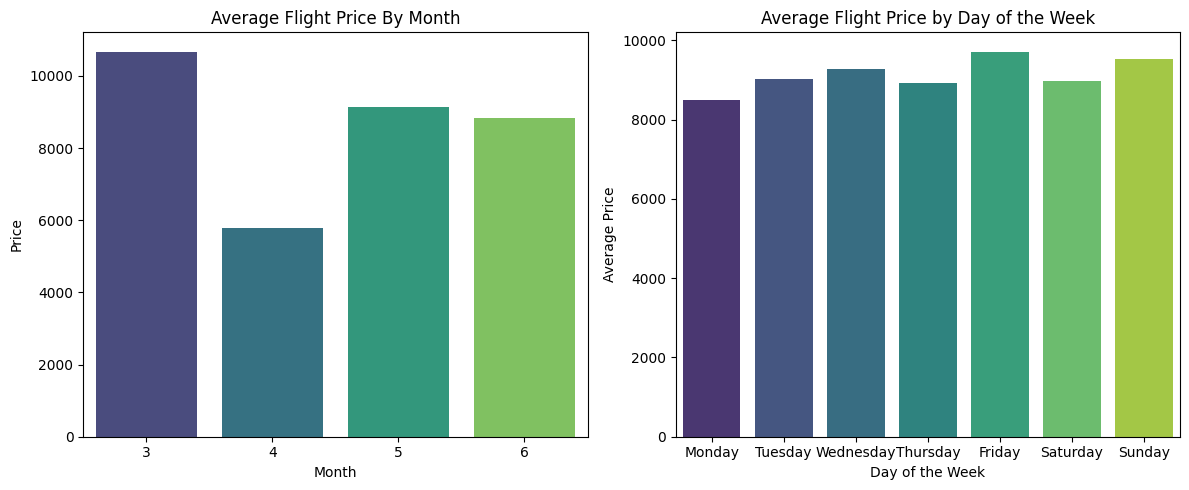

In [45]:
# Plotting
plt.figure(figsize=(12,5))

# Average price by month
plt.subplot(1, 2, 1)
sns.barplot(x='Month', y='Price', data=avg_price_by_month, palette='viridis')
plt.title('Average Flight Price By Month')
plt.xlabel('Month')
plt.ylabel('Price')

# Average price by day of the week
plt.subplot(1, 2, 2)
sns.barplot(x=avg_price_by_day.index, y=avg_price_by_day.values, palette='viridis')
plt.title('Average Flight Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [ ]:
To analyze the Flight Price dataset for trends in flight prices, you can focus on several key features that may
influence pricing. Here's a structured approach to the analysis along with suggested visualizations:

# Features to Analyze:

In [ ]:
1. Date_of_Journey:Analyze trends over time, including seasonal patterns and variations by month and day of the week.

2. Airline: Examine how prices differ across various airlines, which may reflect their pricing strategies and
competition.
    
3. Source and Destination: Investigate how flight prices vary based on the departure and arrival locations.

4. Route: Assess whether direct flights are priced differently compared to those with one or more stops.

5. Duration: Analyze the impact of flight duration on pricing, as longer flights may have different pricing dynamics.

6. Total_Stops: Compare prices for non-stop flights versus those with stops.

7. Additional_Info: Look into other features like baggage policies, meal inclusions, etc., that could affect pricing.

# Analysis Steps:

In [ ]:
1. Data Preparation: Clean the dataset, convert dates to a datetime format, and ensure numerical values are
correctly formatted.
    
2. Descriptive Statistics: Calculate basic statistics (mean, median, etc.) for price based on different features.

3. Trend Analysis: (i)Use time series analysis on price over time.
                   (ii)Group by different categorical features (like airline or month) to observe trends.

# Time Series Line Plot:
- Show trends in average flight prices over time (daily, monthly, etc.).

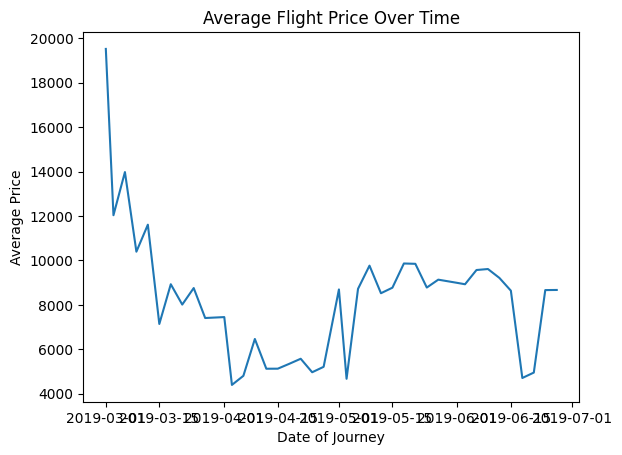

In [51]:
sns.lineplot(data=df.groupby('Date_of_Journey')['Price'].mean().reset_index(), x='Date_of_Journey', y='Price')
plt.title('Average Flight Price Over Time')
plt.xlabel('Date of Journey')
plt.ylabel('Average Price')
plt.show()

# Bar Plot for Average Price by Month
- Display average prices for each month to identify seasonal trends.

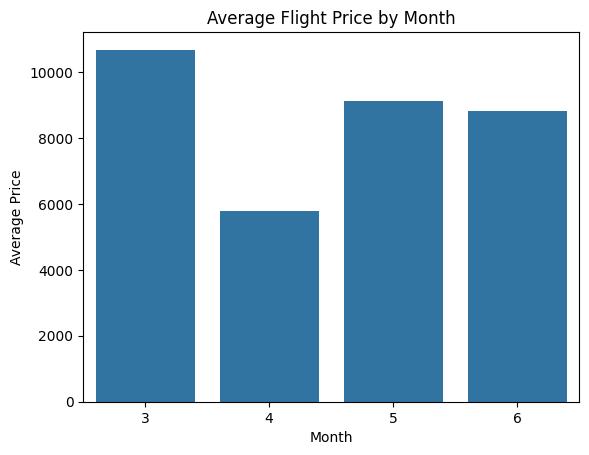

In [53]:
avg_price_by_month = df.groupby(df['Date_of_Journey'].dt.month)['Price'].mean().reset_index()
sns.barplot(x='Date_of_Journey', y='Price', data=avg_price_by_month)
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

# Boxplot for Price Distribution by Airline:
- Compare price distributions across different airlines to identify pricing strategies.

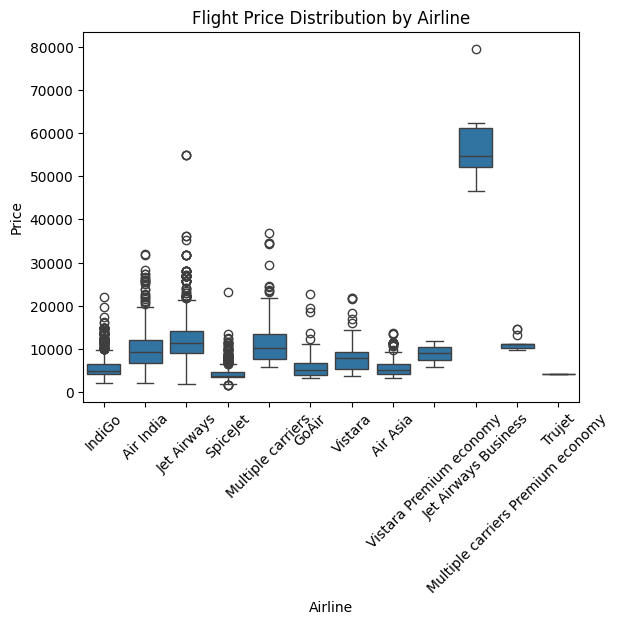

In [54]:
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Price Distribution by Airline')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()

# Heatmap of Average Prices by Source and Destination:
- Visualize how flight prices vary by source and destination airports.

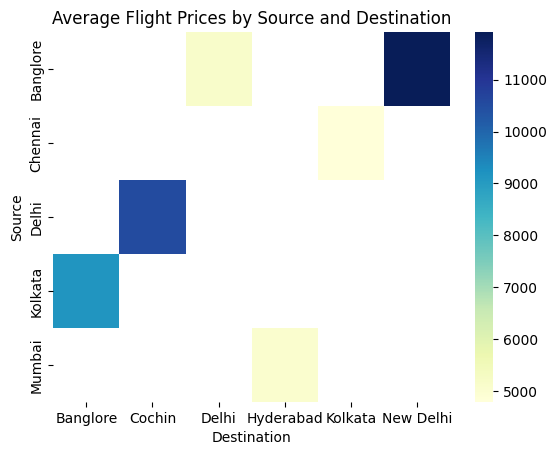

In [55]:
pivot_table = df.pivot_table(values='Price', index='Source', columns='Destination', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Average Flight Prices by Source and Destination')
plt.xlabel('Destination')
plt.ylabel('Source')
plt.show()

# Scatter Plot for Price vs. Duration:
- Analyze the relationship between flight duration and price.

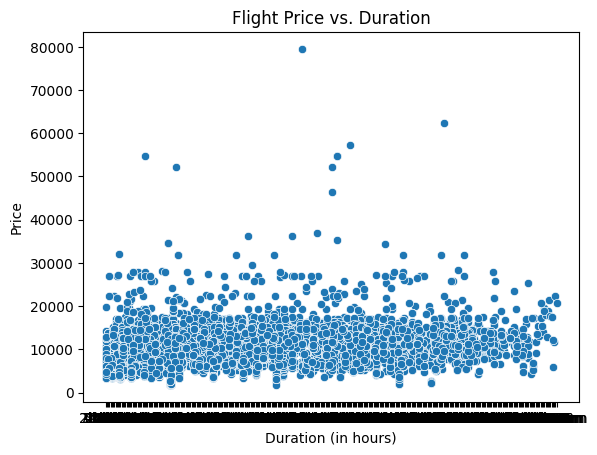

In [56]:
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title('Flight Price vs. Duration')
plt.xlabel('Duration (in hours)')
plt.ylabel('Price')
plt.show()

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [ ]:
To identify the factors that affect flight prices, you can take a comprehensive approach by analyzing various
features in the Flight Price dataset that may influence pricing. Here’s how you can proceed, along with how to
present your findings to the management team:

# Key Features to Analyze:

In [ ]:
1. Airline: Different airlines often have different pricing strategies (e.g., budget vs. premium carriers).

2. Source and Destination: Flight prices can vary significantly based on the cities or airports involved due to
demand, competition, and distance.

3. Date_of_Journey: Analyze how prices vary by date (seasonality, holidays, weekends vs. weekdays).

4. Duration: Longer flights, especially with layovers, may have different pricing structures compared to shorter or
direct flights.
    
5. Total_Stops: Flights with more stops are generally cheaper than direct flights, but this may vary depending on
other factors.

6. Dep_Time and Arrival_Time:

7. Flight prices might be higher during peak hours (morning, evening) compared to less desirable times (late night,
early morning).

8. Additional_Info: Features like baggage allowances, meals, or seat types (economy, business) may affect pricing.

# Analysis Steps:

In [ ]:
1. Data Preparation: (i)Ensure data types are correct (e.g., convert date columns to datetime, price to numeric).
                     (ii)Handle missing values and any potential outliers in the data.

2. Exploratory Data Analysis (EDA): Conduct exploratory analysis to understand the distribution of prices and other
features. Use descriptive statistics and visualizations.

3. Correlation Analysis: Use correlation analysis to understand the strength of relationships between price and
other features.
    
4. Feature Engineering: Create new features that might improve the analysis, such as "flight duration in minutes,"
"weekend or weekday," and "season."

# Boxplot for Price Distribution by Airline:
- Identify which airlines generally charge more or less.

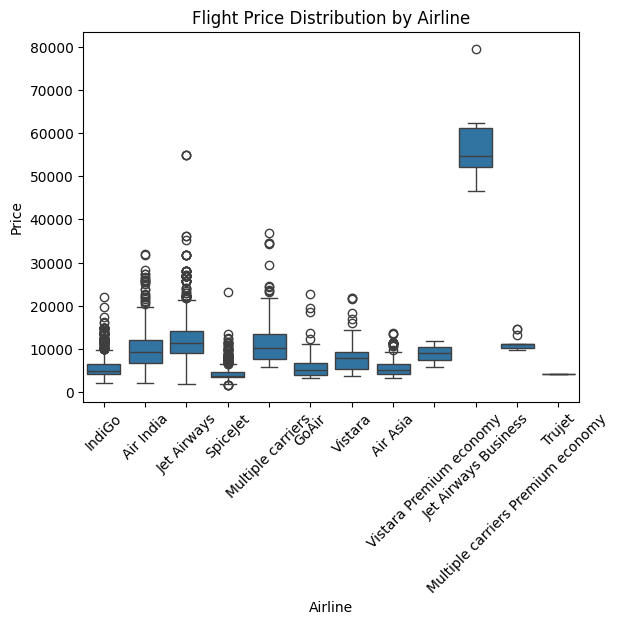

In [57]:
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Price Distribution by Airline')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()

# Bar Plot for Price by Source and Destination:
- Analyze how the origin and destination impact pricing.

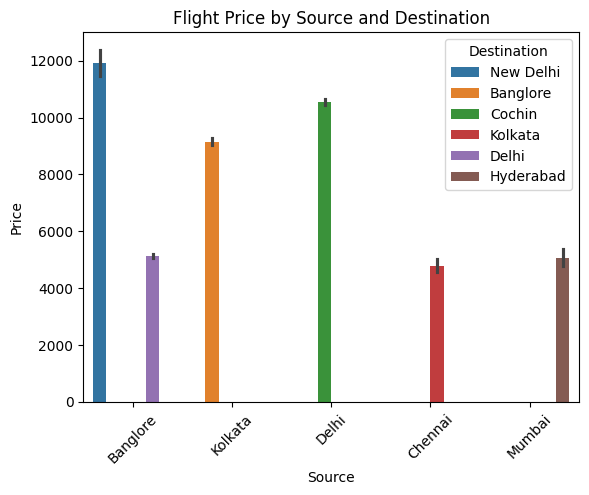

In [58]:
sns.barplot(x='Source', y='Price', hue='Destination', data=df)
plt.title('Flight Price by Source and Destination')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Line Plot for Price over Time (Seasonality):
- Visualize how flight prices fluctuate over time to spot seasonal trends.

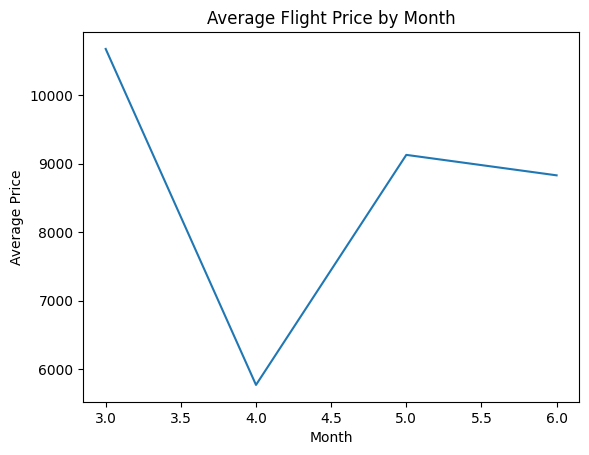

In [59]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Month'] = df['Date_of_Journey'].dt.month
avg_price_by_month = df.groupby('Month')['Price'].mean().reset_index()

sns.lineplot(x='Month', y='Price', data=avg_price_by_month)
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

# Scatter Plot for Price vs. Duration:
- Explore how flight duration correlates with prices.

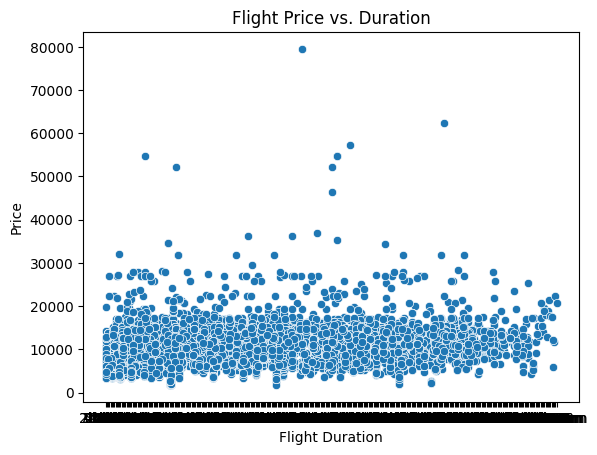

In [63]:
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title('Flight Price vs. Duration')
plt.xlabel('Flight Duration')
plt.ylabel('Price')
plt.show()

# Correlation Heatmap:
- Identify the relationships between flight price and other continuous variables (e.g., duration, number of stops).

In [61]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Flight Prices')
plt.show()

ValueError: could not convert string to float: 'IndiGo'

# Google Playstore

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [64]:
import pandas as pd

In [66]:
df = pd.read_csv('Google_Play_Store_Dataset.csv')

In [67]:
df.shape

(10841, 13)

### So the Google Playstore dataset has 10841 rows and 13 columns

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Clean up the data by dropping missing or invalid ratings
df_clean = df.dropna(subset=['Rating'])

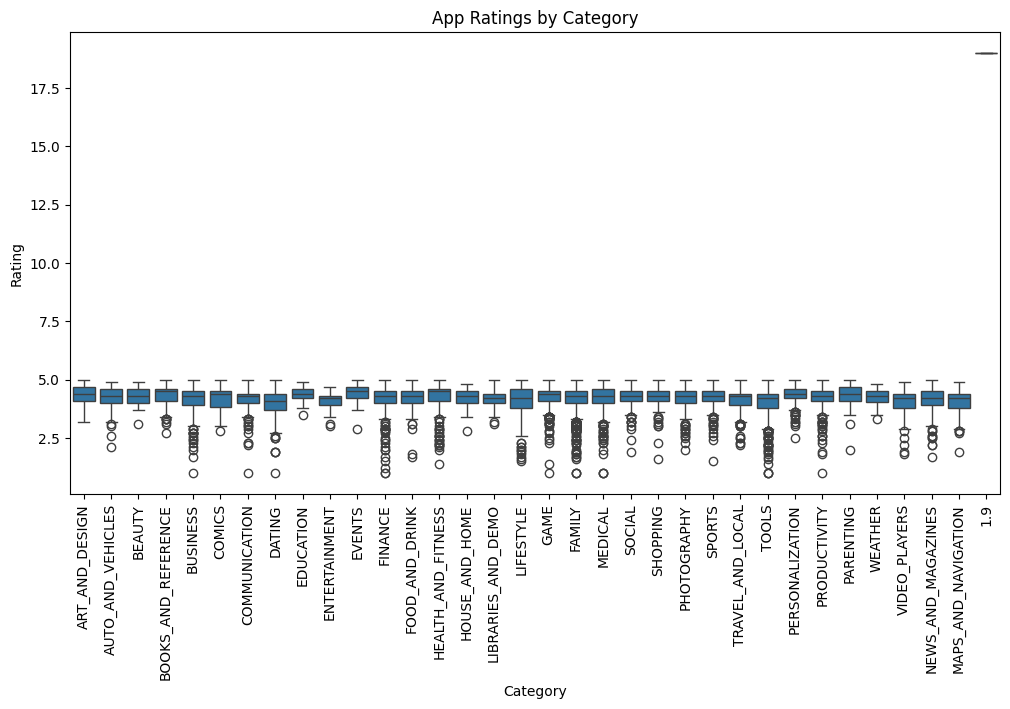

In [72]:
# Plot a boxplot of app ratings by category
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Rating', data=df_clean)
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)    # Rotate x-axis labels for better readability
plt.show()

In [73]:
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [75]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

In [76]:
# Display the count of missing values for each column
print(missing_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [77]:
# Optional: View percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [78]:
print(missing_percentage)

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64


In [ ]:
1. Rating: 1474 missing values. This is a significant amount, and since ratings are crucial for evaluating app
performance, these missing values could impact any analysis involving ratings.
    
3. Type: 1 missing value. This is minimal and might not affect overall analysis.
    
4. Content Rating: 1 missing value. A small number of missing values, so they may not significantly affect analysis.

5. Current Ver: 8 missing values. These missing values might impact any analysis related to app versioning.

6. Android Ver: 3 missing values. Since this is small, you can either drop or impute the missing values.

# Impact on Analysis:

In [ ]:
1. Rating: Missing ratings can significantly impact analysis involving app performance. If too many values are
missing, it might bias your insights, as apps without ratings won’t contribute to metrics like average ratings or
rating distribution by category.

2. Size: If analyzing app performance based on size (e.g., larger apps vs. smaller apps), the missing values may
skew the results or make them less accurate.

3. Type and Content Rating: With minimal missing values in these fields, dropping or imputing them won’t affect
analysis significantly.

4. Current Ver and Android Ver: These fields are important for analyzing compatibility or app updates. Missing
values here could impact any insights drawn from version-related trends.

# How to Handle Missing Values:

In [ ]:
# Drop Missing Values
df_clean = df.dropna()

In [81]:
df.dropna().sum()

App               Photo Editor & Candy Camera & Grid & ScrapBook...
Category          ART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_...
Rating                                                 45395.613985
Reviews           1599678751021564496716717836815137911211388087...
Size              19M14M8.7M25M2.8M5.6M19M29M33M3.1M28M12M20M21M...
Installs          10,000+500,000+5,000,000+50,000,000+100,000+50...
Type              FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...
Price             0000000000000000000000000000000000000000000000...
Content Rating    EveryoneEveryoneEveryoneTeenEveryoneEveryoneEv...
Genres            Art & DesignArt & Design;Pretend PlayArt & Des...
Last Updated      January 7, 2018January 15, 2018August 1, 2018J...
Current Ver       1.0.02.0.01.2.4Varies with device1.111.16.1.61...
Android Ver       4.0.3 and up4.0.3 and up4.0.3 and up4.2 and up...
dtype: object

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Remove rows with missing values in 'Size' and 'Rating'
df_clean = df.dropna(subset=['Size', 'Rating'])

In [90]:
# Convert 'Size' to numeric if necessary (e.g., handling "Varies with device" or other non-numeric entries)
df_clean = df_clean[df_clean['Size'] != 'Varies with device']    # Remove non-numeric size entries
df_clean['Size'] = pd.to_numeric(df_clean['Size'], errors='coerce')

# Drop rows where Size could not be converted to numeric
df_clean = df_clean.dropna(subset=['Size'])

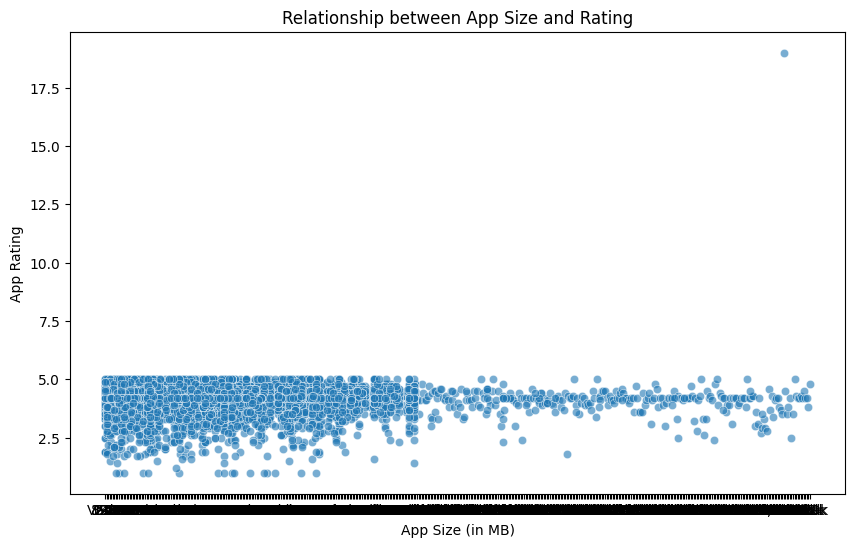

In [97]:
# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Size', y='Rating', data=df, alpha=0.6)

# Set the plot title and labels
plt.title('Relationship between App Size and Rating')
plt.xlabel('App Size (in MB)')
plt.ylabel('App Rating')
plt.show()

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Google_Play_Store_Dataset.csv')

In [7]:
# Convert the 'Price' column to numeric (in case it has non-numeric values, e.g., '$')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [8]:
# Remove any NaN values from the 'Type' and 'Price' columns
df_clean = df.dropna(subset=['Type', 'Price'])

In [9]:
# Group the data by 'Type' and calculate the average price for each type
avg_price_by_type = df_clean.groupby('Type')['Price'].mean().reset_index()

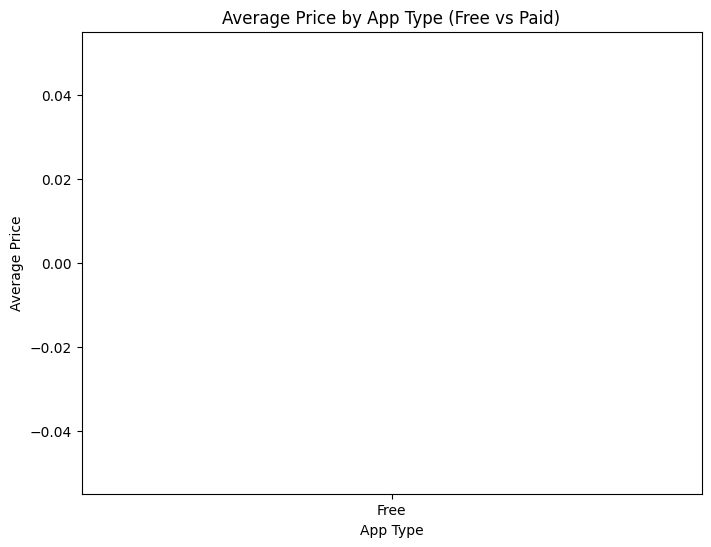

In [11]:
# Create a bar chart to visualize the average price by app type
plt.figure(figsize=(8,6))
sns.barplot(x='Type', y='Price', data=avg_price_by_type)
plt.title('Average Price by App Type (Free vs Paid)')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.show()

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [28]:
import pandas as pd

In [29]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10039, dtype: object

In [31]:
# Clean the 'Installs' column: Remove commas and plus signs, and convert to numeric
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [32]:
# Drop rows with NaN values in 'Installs'
df_clean_drop = df.dropna(subset=['Installs'])

In [33]:
top_10_app = df_clean_drop[['App','Installs']].sort_values(by='Installs',ascending=False).head(10)

In [34]:
print(top_10_app)

                            App    Installs
3665                    YouTube  1000000000
2611                  Instagram  1000000000
2604                  Instagram  1000000000
3687    Google Play Movies & TV  1000000000
3223  Maps - Navigate & Explore  1000000000
2554                    Google+  1000000000
2544                   Facebook  1000000000
5395              Google Photos  1000000000
3232         Google Street View  1000000000
2545                  Instagram  1000000000


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [37]:
import pandas as pd

In [39]:
# Group the data by 'Category' and calculate total installs
category_installs = df.groupby('Category')['Installs'].sum().reset_index()

# Sort by total installs in descending order
category_installs = category_installs.sort_values(by='Installs', ascending=False)

# Display the top categories by total installs
print(category_installs)

               Category     Installs
14                 GAME  35064924450
6         COMMUNICATION  32645916201
25         PRODUCTIVITY  14174679314
27               SOCIAL  14069861902
29                TOOLS  11451044474
11               FAMILY  10226991691
24          PHOTOGRAPHY  10084268915
21   NEWS_AND_MAGAZINES   7496312260
30     TRAVEL_AND_LOCAL   6868704086
31        VIDEO_PLAYERS   6221931720
26             SHOPPING   3247838685
9         ENTERTAINMENT   2868960000
23      PERSONALIZATION   2320235988
3   BOOKS_AND_REFERENCE   1921446260
28               SPORTS   1749930683
15   HEALTH_AND_FITNESS   1582498402
4              BUSINESS   1001502090
12              FINANCE    876463132
8             EDUCATION    870850000
19  MAPS_AND_NAVIGATION    724160790
18            LIFESTYLE    536464429
32              WEATHER    425288520
13       FOOD_AND_DRINK    273838751
7                DATING    264289457
16       HOUSE_AND_HOME    168712461
0        ART_AND_DESIGN    124322100
1

In [40]:
# Calculate average installs per category
category_avg_installs = df.groupby('Category')['Installs'].mean().reset_index()

# Sort by average installs in descending order
category_avg_installs = category_avg_installs.sort_values(by='Installs', ascending=False)

# Display the categories with the highest average installs
print(category_avg_installs)

               Category      Installs
6         COMMUNICATION  9.068310e+07
27               SOCIAL  4.818446e+07
31        VIDEO_PLAYERS  3.638557e+07
25         PRODUCTIVITY  3.579464e+07
14                 GAME  3.304894e+07
24          PHOTOGRAPHY  3.221811e+07
30     TRAVEL_AND_LOCAL  2.792156e+07
21   NEWS_AND_MAGAZINES  2.667727e+07
9         ENTERTAINMENT  1.951673e+07
29                TOOLS  1.496869e+07
26             SHOPPING  1.258852e+07
3   BOOKS_AND_REFERENCE  9.465253e+06
23      PERSONALIZATION  7.508854e+06
32              WEATHER  5.747142e+06
11               FAMILY  5.745501e+06
8             EDUCATION  5.729276e+06
19  MAPS_AND_NAVIGATION  5.486067e+06
15   HEALTH_AND_FITNESS  4.869226e+06
28               SPORTS  4.860919e+06
12              FINANCE  2.511356e+06
4              BUSINESS  2.245520e+06
13       FOOD_AND_DRINK  2.190710e+06
0        ART_AND_DESIGN  2.005195e+06
16       HOUSE_AND_HOME  1.917187e+06
18            LIFESTYLE  1.477863e+06
7           

In [46]:
df_drop = df.dropna(subset='Rating')

In [49]:
df_drop['Rating'].isnull().sum()

np.int64(0)

In [52]:
# Clean and convert the 'Rating' column to numeric (in case it contains NaNs or invalid values)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [55]:
# Group by category and calculate the average rating
category_avg_rating = df.groupby('Category')['Rating'].mean().reset_index()

In [56]:
# Sort by average rating in descending order
category_avg_rating = category_avg_rating.sort_values(by='Rating', ascending=False)

In [57]:
# Display the categories with the highest average rating
print(category_avg_rating)

               Category    Rating
10               EVENTS  4.435556
8             EDUCATION  4.379470
3   BOOKS_AND_REFERENCE  4.349412
22            PARENTING  4.339583
0        ART_AND_DESIGN  4.338983
23      PERSONALIZATION  4.307287
14                 GAME  4.279804
2                BEAUTY  4.278571
15   HEALTH_AND_FITNESS  4.272281
27               SOCIAL  4.259922
26             SHOPPING  4.257627
32              WEATHER  4.230882
28               SPORTS  4.221212
25         PRODUCTIVITY  4.211712
24          PHOTOGRAPHY  4.201003
16       HOUSE_AND_HOME  4.197368
1     AUTO_AND_VEHICLES  4.184722
11               FAMILY  4.181767
17   LIBRARIES_AND_DEMO  4.178462
20              MEDICAL  4.165649
6         COMMUNICATION  4.165359
13       FOOD_AND_DRINK  4.163551
5                COMICS  4.155172
12              FINANCE  4.144516
21   NEWS_AND_MAGAZINES  4.126407
9         ENTERTAINMENT  4.119728
4              BUSINESS  4.118493
30     TRAVEL_AND_LOCAL  4.109633
18            

In [63]:
# Group by 'Category' and 'Type' to calculate total installs for free and paid apps
category_type_install = df.groupby(['Category','Type'])['Installs'].sum().unstack().fillna(0)

# Sort by total installs of free apps
category_type_install = category_type_install.sort_values(by='Free', ascending=False)

In [64]:
# Display the total installs for free and paid apps by category
print(category_type_install)

Type                        Free
Category                        
GAME                 35064924450
COMMUNICATION        32645916201
PRODUCTIVITY         14174679314
SOCIAL               14069861902
TOOLS                11451044474
FAMILY               10226991691
PHOTOGRAPHY          10084268915
NEWS_AND_MAGAZINES    7496312260
TRAVEL_AND_LOCAL      6868704086
VIDEO_PLAYERS         6221931720
SHOPPING              3247838685
ENTERTAINMENT         2868960000
PERSONALIZATION       2320235988
BOOKS_AND_REFERENCE   1921446260
SPORTS                1749930683
HEALTH_AND_FITNESS    1582498402
BUSINESS              1001502090
FINANCE                876463132
EDUCATION              870850000
MAPS_AND_NAVIGATION    724160790
LIFESTYLE              536464429
WEATHER                425288520
FOOD_AND_DRINK         273838751
DATING                 264289457
HOUSE_AND_HOME         168712461
ART_AND_DESIGN         124322100
LIBRARIES_AND_DEMO      62995810
COMICS                  56086150
AUTO_AND_V

# Bar Plot for Total Installs by Category

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

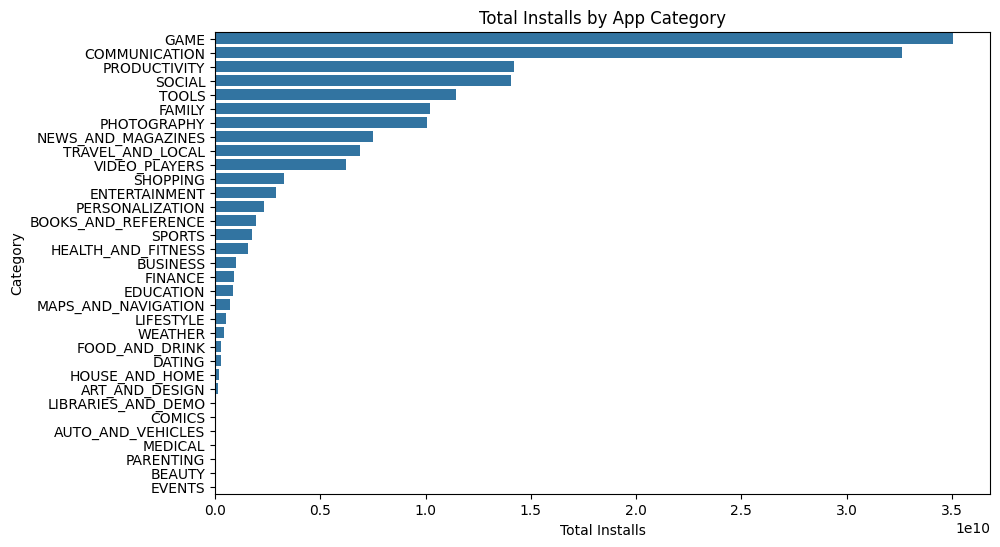

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x='Installs',y='Category', data=category_installs)
plt.title('Total Installs by App Category')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.show()

# Bar Plot for Average Installs per Category

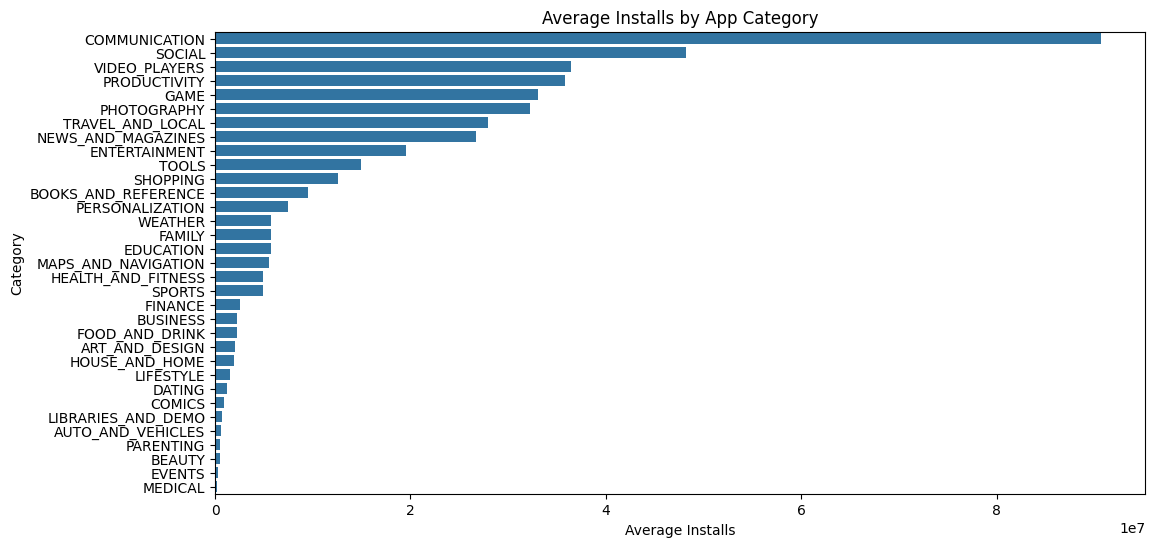

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(x='Installs',y='Category', data=category_avg_installs)
plt.title('Average Installs by App Category')
plt.xlabel('Average Installs')
plt.ylabel('Category')
plt.show()

# Bar Plot for Average Ratings by Category

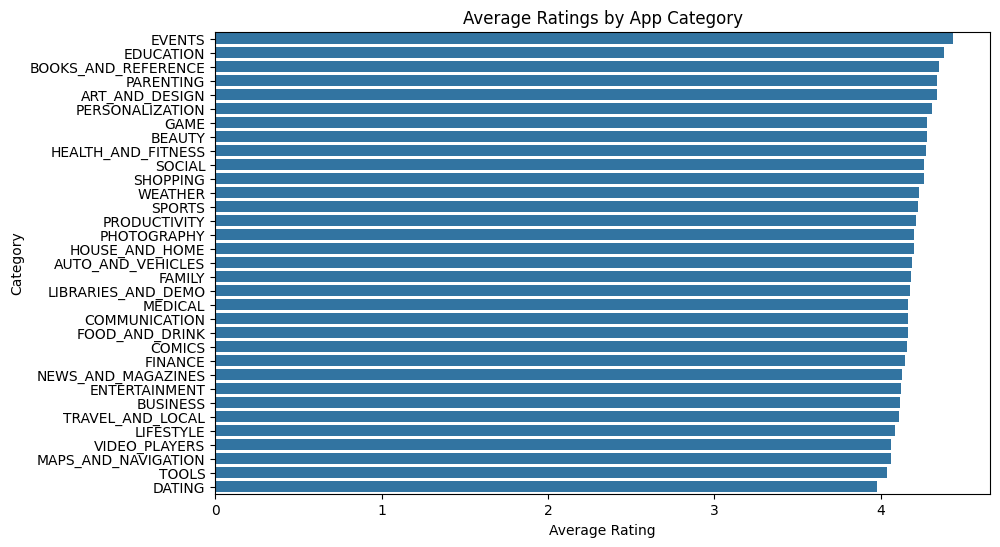

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Category', data=category_avg_rating)
plt.title('Average Ratings by App Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

# Stacked Bar Plot for Free vs. Paid Apps by Category

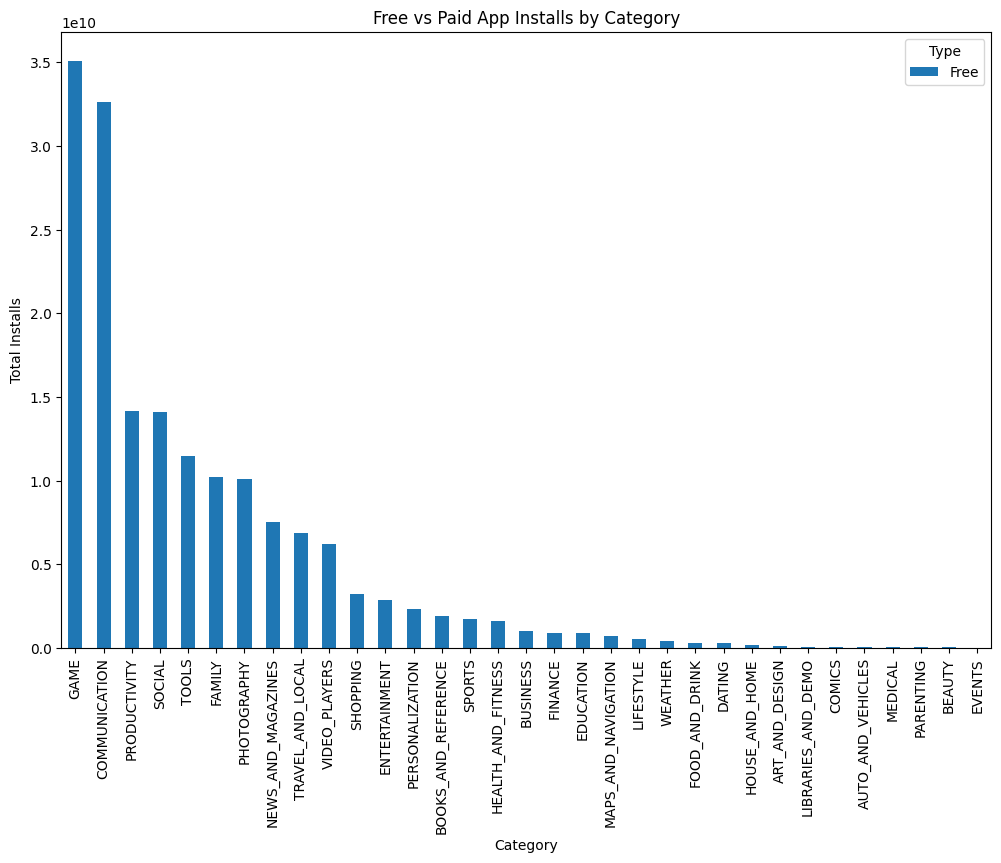

In [65]:
category_type_install.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Free vs Paid App Installs by Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.show()

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

## Group by Developer and Summarize Success Metrics

In [70]:
# Group by 'App' (representing developers or app publishers if no developer field)
developer_success = df.groupby('App').agg({
    'Installs' : 'sum',
    'Rating' : 'mean',
    'Reviews' : 'sum'
}).reset_index()

# Sort developers by total installs (descending order)
top_developers = developer_success.sort_values(by='Installs', ascending=False)

In [71]:
# Display the top 10 developers by installs
print(top_developers)

                         App    Installs  Rating  \
7463          Subway Surfers  6000000000     4.5   
4583             Google News  4000000000     3.9   
4587           Google Photos  4000000000     4.5   
5005               Instagram  4000000000     4.5   
4756                Hangouts  4000000000     4.0   
...                      ...         ...     ...   
8220                 WAH 247           1     NaN   
6388           Pekalongan CJ           0     NaN   
7685  Test Application DT 02           0     NaN   
7533       Sweden Newspapers           0     NaN   
2084              CX Network           0     NaN   

                                               Reviews  
7463  277222642772319327724094277253522772535227711703  
4583                          877635877635877643878065  
4587                  10858556108585381085905110847682  
5005                  66577313665774466657731366509917  
4756                      3419249341943334195133419464  
...                              

# Analyze Average Ratings by Developer

In [72]:
# Sort by average rating
top_rated_developers = developer_success.sort_values(by='Rating', ascending=False)

In [74]:
# Display developers with highest ratings (filter out apps with low install counts if necessary)
print(top_rated_developers.head(10))

                                     App  Installs  Rating Reviews
1934                             CL REPL      1000     5.0      47
437        Accounting Quiz (AQ) Malaysia      1000     5.0      25
7143       Selfie With Champion AJ Style       500     5.0       2
2736  DM Buddy » Learn Digital Marketing       500     5.0       3
2761                             DN Blog        10     5.0      20
2762                      DN Calculators       100     5.0      12
2765                         DN Employee        10     5.0       1
2836                        DT CLOTHINGS        10     5.0       1
6966                          Ríos de Fe      1000     5.0     141
7028                    SUMMER SONIC app       500     5.0       4


# Analyze Reviews by Developer

In [75]:
# Sort by total reviews
most_reviewed_developers = developer_success.sort_values(by='Reviews', ascending=False)

In [76]:
print(most_reviewed_developers.head(10))

                                                    App  Installs  Rating  \
4555                             GollerCepte Live Score   1000000     4.2   
444                        Ad Block REMOVER - NEED ROOT    100000     3.3   
7290                                SnipSnap Coupon App   2000000     4.2   
8020                  US Open Tennis Championships 2018   2000000     4.0   
3207                                         DreamTrips    500000     4.7   
472    Adult Color by Number Book - Paint Mandala Pages    100000     4.3   
1152                     BSPlayer ARMv7 VFP CPU support   1000000     4.3   
3583  Easy Resume Builder, Resume help, Curriculum v...     50000     4.3   
5680                                  MegaFon Dashboard  10000000     3.7   
1665  Buff Thun - Daily Free Webtoon / Comics / Web ...    500000     4.5   

       Reviews  
4555      9992  
444        999  
7290  99759975  
8020  99719971  
3207      9971  
472        997  
1152      9966  
3583       996  

# Bar Plot for Top Developers by Installs

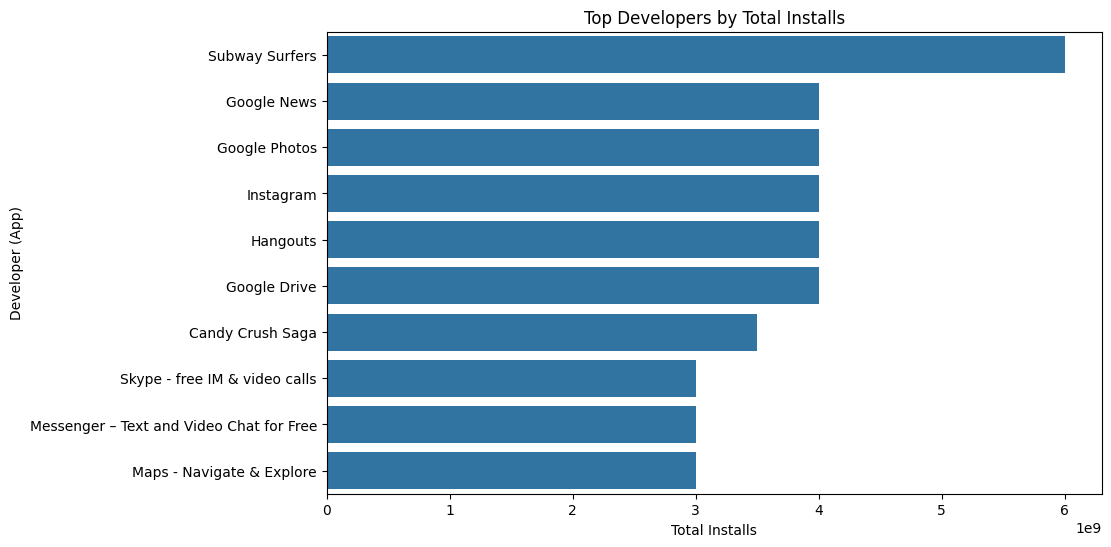

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x='Installs',y='App',data=top_developers.head(10))
plt.title('Top Developers by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Developer (App)')
plt.show()

# Bar Plot for Top Developers by Average Rating

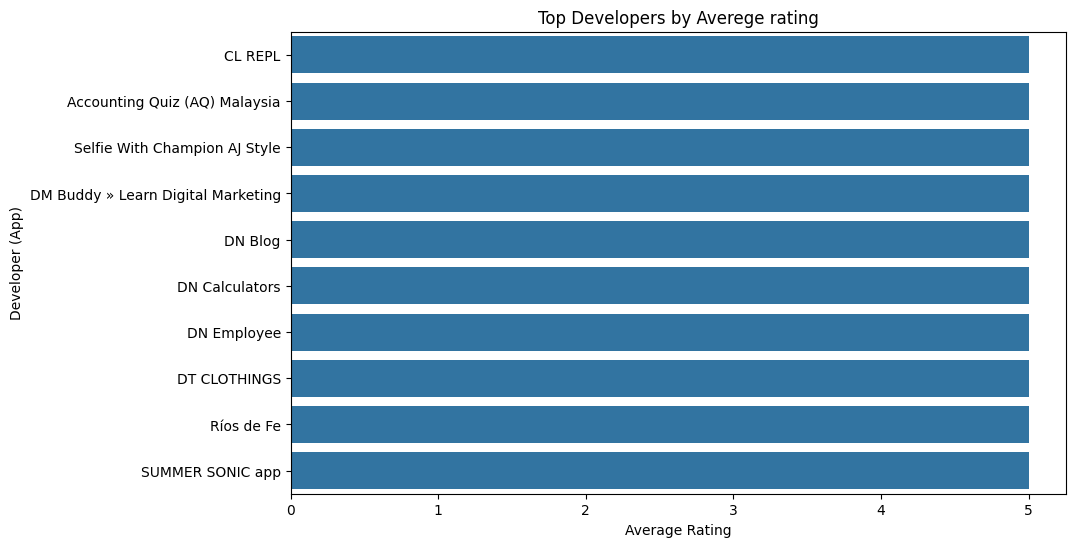

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x='Rating',y='App',data=top_rated_developers.head(10))
plt.title('Top Developers by Averege rating')
plt.xlabel('Average Rating')
plt.ylabel('Developer (App)')
plt.show()

# Bar Plot for Top Developers by Total Reviews

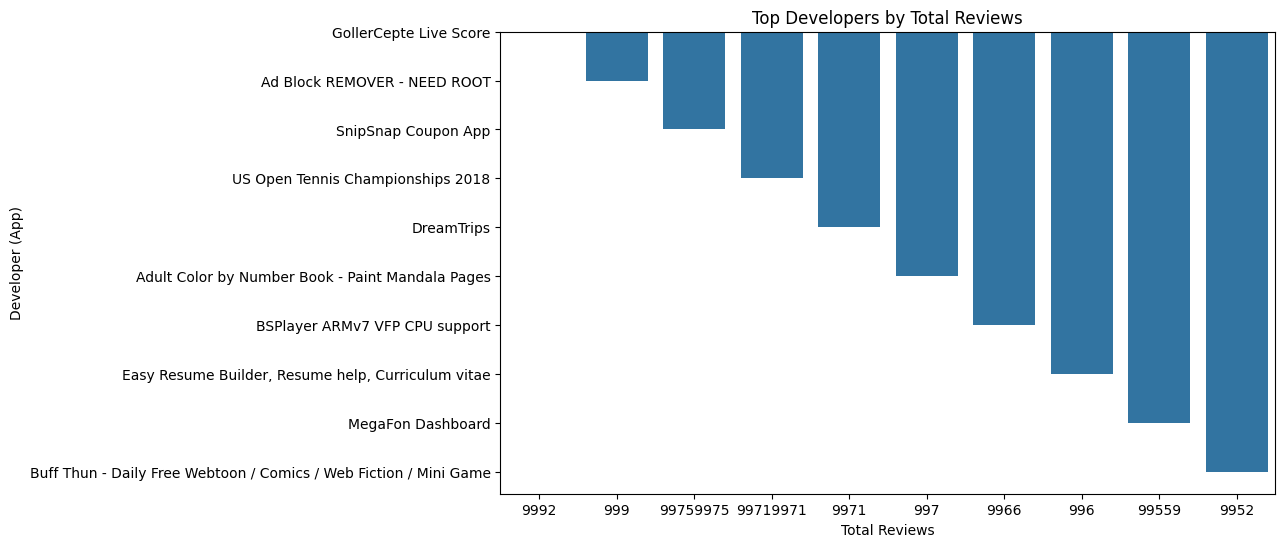

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='App', data=most_reviewed_developers.head(10))
plt.title('Top Developers by Total Reviews')
plt.xlabel('Total Reviews')
plt.ylabel('Developer (App)')
plt.show()

## Scatter Plot of Rating vs. Installs by Developer

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', hue='App', data=top_developers)
plt.title('Rating vs. Installs for Top Developers')
plt.xlabel('Total Installs')
plt.ylabel('Average Rating')
plt.legend(loc='upper right')
plt.show()

C:\Users\SOUMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SOUMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SOUMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128044 (\N{DOLPHIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SOUMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SOUMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabto

ValueError: Image size of 1431x186612 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [84]:
# Convert 'Last Updated' column to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [85]:
# Extract month and year from 'Last Updated'
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year

In [86]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,6,2018


## Analyze Installs Over Time

In [87]:
# Group by month and year to get the total installs
monthly_installs = df.groupby(['Year', 'Month'])['Installs'].sum().reset_index()

In [88]:
# Sort the data
monthly_installs = monthly_installs.sort_values(by=['Year', 'Month'])

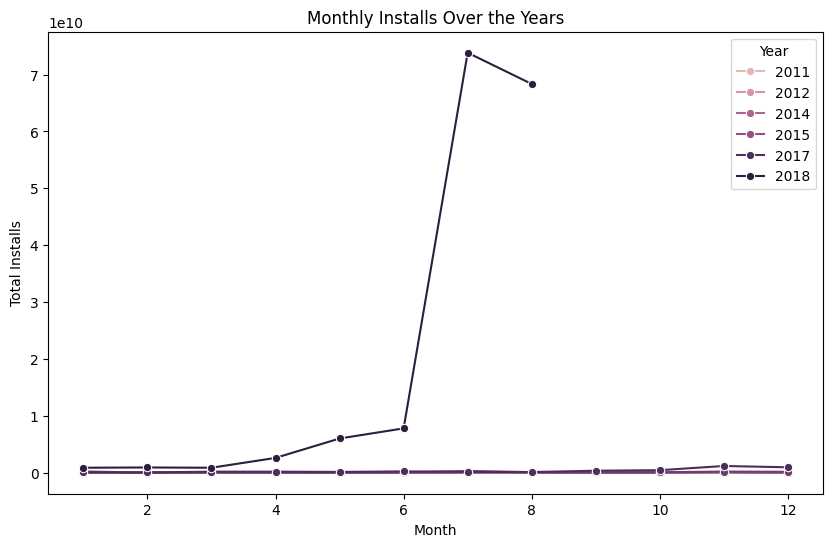

In [89]:
# Plot installs over time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Installs', hue='Year', data=monthly_installs, marker='o')
plt.title('Monthly Installs Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Installs')
plt.show()

## Analyze Ratings Over Time

In [90]:
# Group by month and year to get the average rating
monthly_ratings = df.groupby(['Year', 'Month'])['Rating'].mean().reset_index()

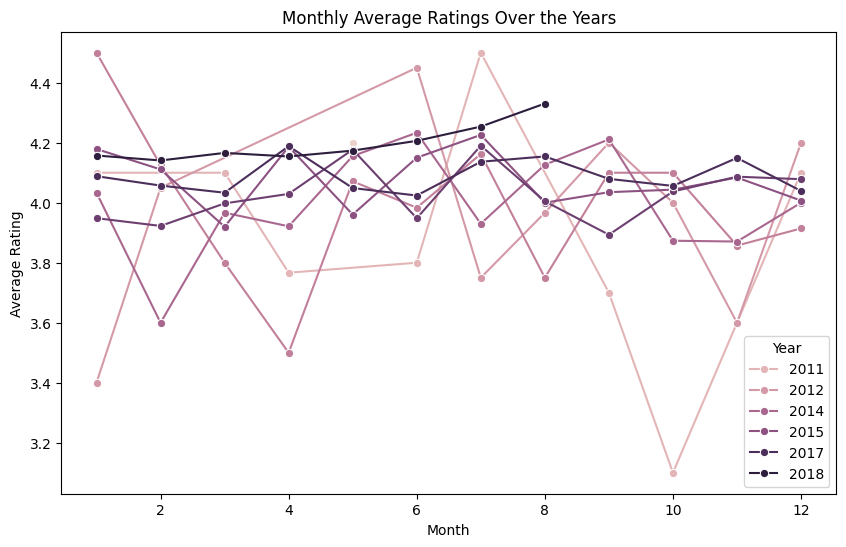

In [91]:
# Plot ratings over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Rating', hue='Year', data=monthly_ratings, marker='o')
plt.title('Monthly Average Ratings Over the Years')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()

## Analyze Reviews Over Time

In [92]:
# Group by month and year to get the total reviews
monthly_reviews = df.groupby(['Year', 'Month'])['Reviews'].sum().reset_index()

In [95]:
# Plot reviews over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Reviews', hue='Year', data=monthly_reviews, marker='o')
plt.title('Monthly Reviews Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.show()

ValueError: Image size of 109163x547 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

## Compare App Categories by Time of Year

In [96]:
# Group by category and month to analyze installs
category_month_installs = df.groupby(['Category', 'Month'])['Installs'].sum().reset_index()

# Plot a heatmap for category performance over the months
plt.figure(figsize=(12, 8))
category_pivot = category_month_installs.pivot("Category", "Month", "Installs")
sns.heatmap(category_pivot, cmap="Blues", annot=False)
plt.title('Category-wise Monthly Installs')
plt.xlabel('Month')
plt.ylabel('Category')
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

<Figure size 1200x800 with 0 Axes>